# Gallery of Multiple Window Comparisons between _hvsrpy_ and _geopsy_

## License Information

This file is part of _hvsrpy_, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2024 Joseph P. Vantassel (joseph.p.vantassel@gmail.com)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_

_hvsrpy_ is an open-source Python package for performing horizontal-to-vertical spectral ratio (HVSR) processing
of microtremor and earthquake recordings. _hvsrpy_ was developed by [Jospeh P. Vantassel](https://www.jpvantassel.com/)
with contributions from Dana M. Brannon under the supervision of Professor Brady R. Cox at The University of Texas at Austin.
_hvsrpy_ continues to be developed and maintained by [Joseph P. Vantassel and his research group at Virginia Tech](https://geoimaging-research.org/).

## Citation

If you use _hvsrpy_ in your research or consulting, we ask you please cite the following:

>Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for hvsrpy, please use the citation tool on the hvsrpy
[archive](http://doi.org/10.5281/zenodo.3666956)._

## About this notebook

This notebook demonstrates that _hvsrpy_ can exactly replicate _geopsy_ when the same settings are used.

The microtremor data presented are those by Cox and Vantassel (2018).
If you use this data, please also cite Cox and Vantassel (2018).

> Cox, B.R. and Vantassel, J.P. (2018). Dynamic Characterization of Wellington, New Zealand. DesignSafe-CI [publisher]. https://doi.org/10.17603/DS24M6J

Happy Processing!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import hvsrpy
from hvsrpy.hvsr_geopsy import HvsrGeopsy

plt.style.use(hvsrpy.HVSRPY_MPL_STYLE)

In [2]:
def plot_comparison_figure(hvsr_hvsrpy, hvsr_geopsy):
    fig, ax = hvsrpy.plot_single_panel_hvsr_curves(hvsr_hvsrpy, 
                                                   plot_peak_individual_valid_curves=False,
                                                   plot_frequency_std=False,
                                                   plot_peak_mean_curve=False)
    
    ax.legend().remove()
    ax.plot(hvsr_hvsrpy.frequency, hvsr_hvsrpy.mean_curve(), color="black", linestyle="-", label="hvsrpy") 
    ax.plot(hvsr_geopsy.frequency, hvsr_geopsy.mean_curve(), color="red", linestyle="--", label="geopsy")
    ax.plot(hvsr_geopsy.frequency, hvsr_geopsy.nth_std_curve(-1), color="red", linestyle="--")
    ax.plot(hvsr_geopsy.frequency, hvsr_geopsy.nth_std_curve(+1), color="red", linestyle="--")
    ax.set_ylim(0, 10)
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[-2:], l[-2:])
    return (fig, ax)

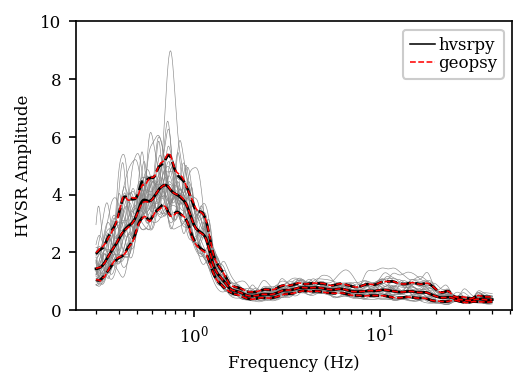

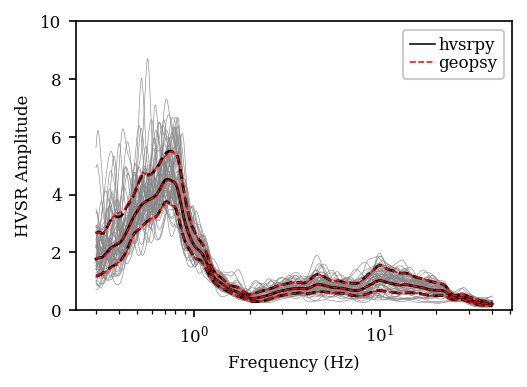

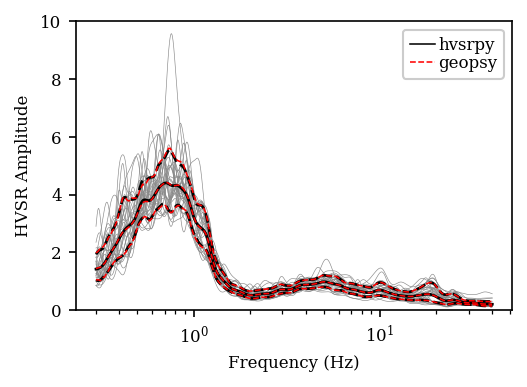

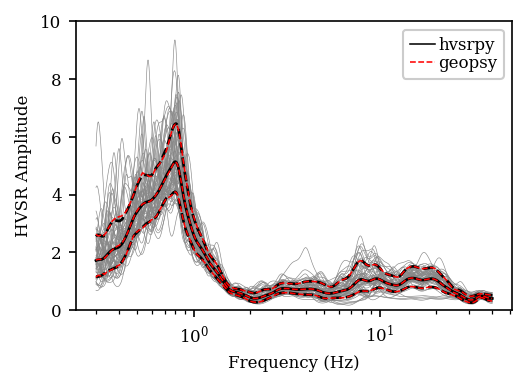

In [3]:
hvsrpy_files = [
    "./data/UT.STN11.A2_C50.miniseed",
    "./data/UT.STN11.A2_C150.miniseed",
    "./data/UT.STN12.A2_C50.miniseed",
    "./data/UT.STN12.A2_C150.miniseed",
]

geopsy_files = [
    "./data/multiple_window/UT_STN11_c050.hv",
    "./data/multiple_window/UT_STN11_c150.hv",
    "./data/multiple_window/UT_STN12_c050.hv",
    "./data/multiple_window/UT_STN12_c150.hv",
]

preprocessing_settings = hvsrpy.HvsrPreProcessingSettings()
preprocessing_settings.window_length_in_seconds = 60.
preprocessing_settings.detrend = "constant"

processing_settings = hvsrpy.HvsrTraditionalProcessingSettings()
processing_settings.smoothing = dict(operator='konno_and_ohmachi',
                                     bandwidth=40,
                                     center_frequencies_in_hz=np.geomspace(0.3, 40, 2048))
processing_settings.method_to_combine_horizontals = "squared_average"
processing_settings.window_type_and_width = ('tukey', 0.1)

for hvsrpy_file, geopsy_file in zip(hvsrpy_files, geopsy_files):

    srecords = hvsrpy.read([[hvsrpy_file]])
    srecords = hvsrpy.preprocess(srecords, preprocessing_settings)
    hvsr_hvsrpy = hvsrpy.process(srecords, processing_settings)

    hvsr_geopsy = HvsrGeopsy.from_file(geopsy_file)

    fig, ax = plot_comparison_figure(hvsr_hvsrpy, hvsr_geopsy)
    figure_name = f"../figs/multiwindow_{geopsy_file[-13:-3]}.png"
    plt.savefig(figure_name, dpi=200)
    plt.show()
    plt.close()